This notebook accompanies the following blog post:
https://medium.com/@kaganoezdemir97/what-is-the-relationship-between-monthly-stock-market-index-consumer-price-indices-and-central-568f80b3e24f

# Necessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# Import the dataset

In [5]:
dataset = pd.read_excel(r"C:\Users\kagan\OneDrive\Masaüstü\DATA\borsa_faiz_enflasyon_transformed.xlsx")
dataset

,date,interest_rate_index,stock_market_close,general_cpi,logCPI,logStockClose,logInterestRate
0,2019-06,1004.226809,964.85,413.63,2.616612,2.984460,3.001832
1,2019-07,1019.702150,1020.82,419.24,2.622463,3.008949,3.008473
2,2019-08,1037.750006,967.18,422.84,2.626176,2.985507,3.016093
3,2019-09,1053.749343,1050.33,427.04,2.630469,3.021326,3.022737
4,2019-10,1068.238568,984.69,435.59,2.639078,2.993300,3.028668
...,...,...,...,...,...,...,...
56,2024-02,2137.517871,9193.69,2073.88,3.316784,3.963490,3.329910
57,2024-03,2218.859890,9142.40,2139.47,3.330306,3.961060,3.346130
58,2024-04,2313.416094,10045.74,2207.50,3.343901,4.001982,3.364254
59,2024-05,2422.017600,10400.48,2281.85,3.358287,4.017053,3.384177


# Time-dependent behavior of these series

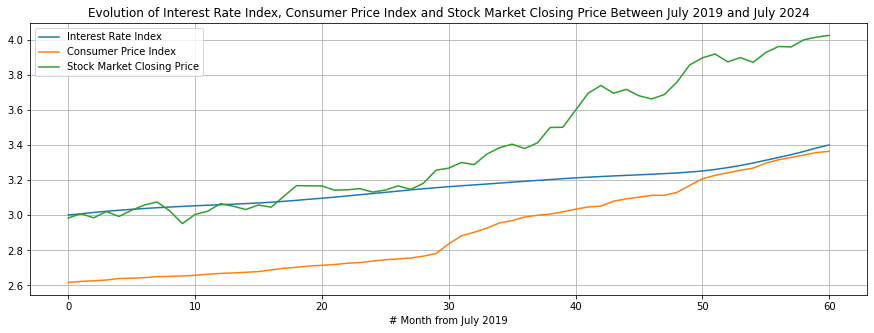

In [19]:
_ = plt.figure(figsize = (15, 5))
_ = plt.plot(dataset["logInterestRate"], label = "Interest Rate Index")
_ = plt.plot(dataset["logCPI"], label = "Consumer Price Index")
_ = plt.plot(dataset["logStockClose"], label = "Stock Market Closing Price")
_ = plt.xlabel("# Month from July 2019")
_ = plt.title("Evolution of Interest Rate Index, Consumer Price Index and Stock Market Closing Price Between July 2019 and July 2024")
_ = plt.grid()
_ = plt.legend()

# Stationarity Tests

In [42]:
vars_ = ["interest_rate_index",	"stock_market_close",	"general_cpi"]
for series in vars_:
    print(adfuller(dataset[series]))

(2.546941436725517, 0.999063440803383, 6, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 261.1045796262565)
(0.03430085836588663, 0.9612784744241152, 11, 49, {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}, 719.8595273474072)
(2.5756663374606434, 0.9990702564475481, 11, 49, {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}, 447.7048995959202)


In [20]:
log_transformed_vars = ["logCPI", "logStockClose", "logInterestRate"]
for series in log_transformed_vars:
    print(adfuller(dataset[series]))

(1.0900745983477207, 0.9951310167651457, 1, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, -312.1586610080494)
(0.7797891433923665, 0.9913028221480081, 0, 60, {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}, -179.90363668124124)
(1.3815613345100817, 0.997028746882152, 5, 55, {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}, -560.5484881410637)


## Computing returns to a different dataset

In [44]:
returns = dataset[vars_].pct_change().dropna()
returns

,interest_rate_index,stock_market_close,general_cpi
1,0.015410,0.058009,0.013563
2,0.017699,-0.052546,0.008587
3,0.015417,0.085972,0.009933
4,0.013750,-0.062495,0.020022
5,0.012698,0.085661,0.003811
6,0.010937,0.070353,0.007433
7,0.010136,0.041206,0.013507
8,0.008918,-0.110341,0.003517
9,0.008750,-0.154254,0.005714
10,0.007996,0.127906,0.008545


In [21]:
log_transformed_returns = dataset[log_transformed_vars].pct_change().dropna()
log_transformed_returns

,logCPI,logStockClose,logInterestRate
1,0.002236,0.008206,0.002212
2,0.001416,-0.007791,0.002533
3,0.001635,0.011997,0.002203
4,0.003273,-0.009276,0.001962
5,0.000626,0.011925,0.001809
6,0.001218,0.009748,0.001557
7,0.002204,0.005734,0.001441
8,0.000575,-0.016507,0.001267
9,0.000933,-0.024051,0.001242
10,0.001392,0.017704,0.001134


# Granger causality tests

In [45]:
lag = 12
for cause in vars_:
    for result in vars_:
        if cause != result:
            print("========= Granger Causality Test on RETURNS =========")
            print()
            print("Cause: ", cause)
            print("Result: ", result)
            causes = grangercausalitytests(returns[[result, cause]], lag)
            print()

========= Granger Causality Test on RETURNS =========

Cause:  interest_rate_index
Result:  stock_market_close

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0325  , p=0.8575  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=0.0343  , p=0.8531  , df=1
likelihood ratio test: chi2=0.0343  , p=0.8531  , df=1
parameter F test:         F=0.0325  , p=0.8575  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0329  , p=0.9676  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=0.0721  , p=0.9646  , df=2
likelihood ratio test: chi2=0.0720  , p=0.9646  , df=2
parameter F test:         F=0.0329  , p=0.9676  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2290  , p=0.8758  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=0.7831  , p=0.8535  , df=3
likelihood ratio test: chi2=0.7777  , p=0.8548  , df=3
parameter F test:         F=0.2290  , p=0.8758  , df_denom=50

ssr based F test:         F=0.7718  , p=0.3834  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=0.8132  , p=0.3672  , df=1
likelihood ratio test: chi2=0.8076  , p=0.3688  , df=1
parameter F test:         F=0.7718  , p=0.3834  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9277  , p=0.1555  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=4.2191  , p=0.1213  , df=2
likelihood ratio test: chi2=4.0727  , p=0.1305  , df=2
parameter F test:         F=1.9277  , p=0.1555  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9011  , p=0.1414  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=6.5017  , p=0.0896  , df=3
likelihood ratio test: chi2=6.1569  , p=0.1042  , df=3
parameter F test:         F=1.9011  , p=0.1414  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3237  , p=0.2750  , df_denom=47, df_num=4
ssr based chi2 test:   chi2=

In [41]:
# statsmodels granger test takes second column as the cause for the one in the first
lag = 12
for cause in log_transformed_vars:
    for result in log_transformed_vars:
        if cause != result:
            print("========= Granger Causality Test on RETURNS =========")
            print()
            print("Cause: ", cause)
            print("Result: ", result)
            causes = grangercausalitytests(log_transformed_returns[[result, cause]], lag)
            print()
        
    

========= Granger Causality Test on RETURNS =========

Cause:  logCPI
Result:  logStockClose

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9448  , p=0.3352  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=0.9954  , p=0.3184  , df=1
likelihood ratio test: chi2=0.9871  , p=0.3205  , df=1
parameter F test:         F=0.9448  , p=0.3352  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0086  , p=0.1443  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=4.3961  , p=0.1110  , df=2
likelihood ratio test: chi2=4.2375  , p=0.1202  , df=2
parameter F test:         F=2.0086  , p=0.1443  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0720  , p=0.1157  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=7.0863  , p=0.0692  , df=3
likelihood ratio test: chi2=6.6792  , p=0.0829  , df=3
parameter F test:         F=2.0720  , p=0.1157  , df_denom=50, df_num=3

Grange


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0658  , p=0.7985  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=0.0693  , p=0.7924  , df=1
likelihood ratio test: chi2=0.0692  , p=0.7924  , df=1
parameter F test:         F=0.0658  , p=0.7985  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0845  , p=0.9191  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=0.1849  , p=0.9117  , df=2
likelihood ratio test: chi2=0.1846  , p=0.9118  , df=2
parameter F test:         F=0.0845  , p=0.9191  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3372  , p=0.7985  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=1.1533  , p=0.7642  , df=3
likelihood ratio test: chi2=1.1418  , p=0.7670  , df=3
parameter F test:         F=0.3372  , p=0.7985  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0942  , p=0.9838  , df_d